In [29]:
#Importing data file

import os
import glob
import pandas as pd

os.chdir(r"C:\Users\AC028TX\Desktop\Intelipaat\Python for Data Science\support docs(Code-PPT-Assignment-project)\My work\Project\Python Project 1\scripts\names")
#files=glob.glob("*.txt")

#df=pd.concat([pd.read_csv(f,header=None) for f in glob.glob("*.txt")],ignore_index=True,sort=True)


In [64]:
#To add year column in data

from pathlib import Path
p = Path(r"C:\Users\AC028TX\Desktop\Intelipaat\Python for Data Science\support docs(Code-PPT-Assignment-project)\My work\Project\Python Project 1\scripts\data")
for i, j in enumerate(glob.glob("*.txt")):
    df = pd.read_csv(j, header = None)
    fname = j 
    fname = fname.replace(".txt","")
    fname = fname.replace("yob","")
    df["year"] = fname
    df.to_csv(Path(p, fname + ".csv"))
df.head()

,0,1,2,year
0,Emma,F,19414,2016
1,Olivia,F,19246,2016
2,Ava,F,16237,2016
3,Sophia,F,16070,2016
4,Isabella,F,14722,2016


In [5]:
#to combine the data
os.chdir(r"C:\Users\AC028TX\Desktop\Intelipaat\Python for Data Science\support docs(Code-PPT-Assignment-project)\My work\Project\Python Project 1\scripts\data")
Combined = pd.DataFrame([])
for counter, file in enumerate(glob.glob("*.csv")):
    df = pd.read_csv(file, header = None, skiprows=0)
    Combined = Combined.append(df)
    print(file)

1880.csv
1881.csv
1882.csv
1883.csv
1884.csv
1885.csv
1886.csv
1887.csv
1888.csv
1889.csv
1890.csv
1891.csv
1892.csv
1893.csv
1894.csv
1895.csv
1896.csv
1897.csv
1898.csv
1899.csv
1900.csv
1901.csv
1902.csv
1903.csv
1904.csv
1905.csv
1906.csv
1907.csv
1908.csv
1909.csv
1910.csv
1911.csv
1912.csv
1913.csv
1914.csv
1915.csv
1916.csv
1917.csv
1918.csv
1919.csv
1920.csv
1921.csv
1922.csv
1923.csv
1924.csv
1925.csv
1926.csv
1927.csv
1928.csv
1929.csv
1930.csv
1931.csv
1932.csv
1933.csv
1934.csv
1935.csv
1936.csv
1937.csv
1938.csv
1939.csv
1940.csv
1941.csv
1942.csv
1943.csv
1944.csv
1945.csv
1946.csv
1947.csv
1948.csv
1949.csv
1950.csv
1951.csv
1952.csv
1953.csv
1954.csv
1955.csv
1956.csv
1957.csv
1958.csv
1959.csv
1960.csv
1961.csv
1962.csv
1963.csv
1964.csv
1965.csv
1966.csv
1967.csv
1968.csv
1969.csv
1970.csv
1971.csv
1972.csv
1973.csv
1974.csv
1975.csv
1976.csv
1977.csv
1978.csv
1979.csv
1980.csv
1981.csv
1982.csv
1983.csv
1984.csv
1985.csv
1986.csv
1987.csv
1988.csv
1989.csv
1990.csv
1

In [6]:
combined = Combined.drop(df.index[0])
combined = combined.drop(df.index[0], axis = 1)

In [27]:
combined.head()

,1,2,3,4
1,Mary,F,7065,1880
2,Anna,F,2604,1880
3,Emma,F,2003,1880
4,Elizabeth,F,1939,1880
5,Minnie,F,1746,1880


In [7]:
#to add column names
col = ["Name", "Sex", "Count", "year"]
combined.columns=col
combined.head()

,Name,Sex,Count,year
1,Mary,F,7065,1880
2,Anna,F,2604,1880
3,Emma,F,2003,1880
4,Elizabeth,F,1939,1880
5,Minnie,F,1746,1880


In [8]:
combined = combined.sort_values("year", ascending = True, axis = 0)
combined.head()

,Name,Sex,Count,year
1,Mary,F,7065,1880
1342,Vern,M,19,1880
1341,Stewart,M,19,1880
1340,Randolph,M,19,1880
1339,Lucien,M,19,1880


In [9]:
combined.groupby("Sex")["Count"].sum()

Sex
F    170639571
M    173894326
Name: Count, dtype: int64

In [10]:
combined.groupby("Sex").agg({"Count":sum})

,Count
Sex,
F,170639571
M,173894326


In [55]:
combined.groupby("year").agg({"Count":sum})

,Count
year,
1880,201483
1881,192696
1882,221533
1883,216945
1884,243463
1885,240854
1886,255317
1887,247396
1888,299475


In [11]:
combined.isnull().sum()

Name     0
Sex      0
Count    0
year     0
dtype: int64

<BarContainer object of 137 artists>

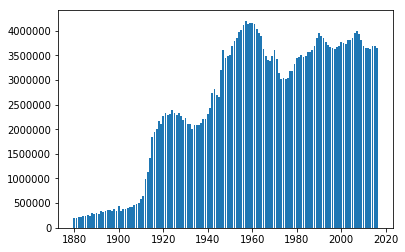

In [12]:
#finding the count of babies born in particular year

import matplotlib.pyplot as plt
%matplotlib inline

df=combined.groupby("year").agg({"Count":sum})

year = range(1880,2017,1)
plt.bar(year,df["Count"])

<BarContainer object of 2 artists>

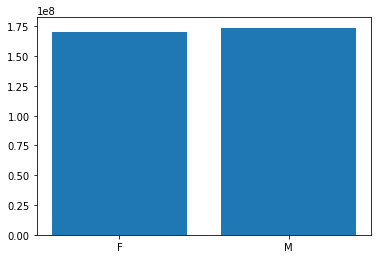

In [13]:
# finding the count of male and female 

df=combined.groupby("Sex").agg({"Count":sum})
Sex=['F','M']
plt.bar(Sex,df["Count"])

In [32]:
#Filtering particular name and identifying count of it in each year

hulda = combined["Name"] == "Hulda"
nam_hulda = combined[hulda]
Anna = combined["Name"] == "Anna"
nam_Anna = combined[Anna]
Mary = combined["Name"] == "Mary"
nam_Mary = combined[Mary]
nam_Mary.head(5)

,Name,Sex,Count,year
1,Mary,F,7065,1880
1274,Mary,M,27,1880
1239,Mary,M,29,1881
1,Mary,F,6919,1881
1342,Mary,M,30,1882


Text(0, 0.5, 'Count')

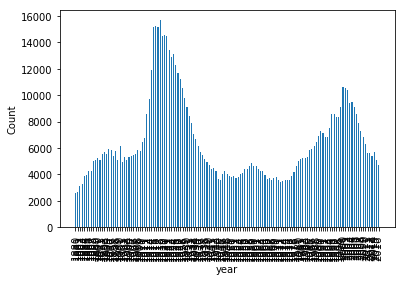

In [62]:
#Determine the naming trend (Here we tried to plot name Anna is repeated how many time in particular year)
#This will help us to know name Anna is most used in which year

plt.bar(nam_Anna['year'],nam_Anna['Count'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("Count")